In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)



603

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | udarnyy
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | wanning
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | emborion
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | kutum
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | mayor pablo lagerenza
Processing Record 12 of Set 1 | cervo
Processing Record 13 of Set 1 | pamplona
Processing Record 14 of Set 1 | leh
Processing Record 15 of Set 1 | malwan
City not found. Skipping...
Processing Record 16 of Set 1 | kontagora
Processing Record 17 of Set 1 | hovd
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | egvekinot
Processing Record 20 of Set 1 | avera
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | mackay
Processing Record 23 of Se

Processing Record 36 of Set 4 | at-bashi
Processing Record 37 of Set 4 | dwarka
Processing Record 38 of Set 4 | almaznyy
Processing Record 39 of Set 4 | port hardy
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | benghazi
Processing Record 42 of Set 4 | nikolskoye
Processing Record 43 of Set 4 | aylesbury
Processing Record 44 of Set 4 | bonthe
Processing Record 45 of Set 4 | mayumba
Processing Record 46 of Set 4 | nuqui
Processing Record 47 of Set 4 | correntina
Processing Record 48 of Set 4 | morelia
Processing Record 49 of Set 4 | hami
Processing Record 50 of Set 4 | burnie
Processing Record 1 of Set 5 | usinsk
Processing Record 2 of Set 5 | welkom
Processing Record 3 of Set 5 | lolua
City not found. Skipping...
Processing Record 4 of Set 5 | devin
Processing Record 5 of Set 5 | manikling
Processing Record 6 of Set 5 | katsuura
Processing Record 7 of Set 5 | hohhot
Processing Record 8 of Set 5 | calvia
Processing Record 9 of Set 5 | malanje
Processing Record

Processing Record 28 of Set 8 | great yarmouth
Processing Record 29 of Set 8 | brora
Processing Record 30 of Set 8 | amapa
Processing Record 31 of Set 8 | orange cove
Processing Record 32 of Set 8 | tucuman
Processing Record 33 of Set 8 | bac lieu
Processing Record 34 of Set 8 | nata
Processing Record 35 of Set 8 | les cayes
Processing Record 36 of Set 8 | ako
Processing Record 37 of Set 8 | dutlwe
Processing Record 38 of Set 8 | marcona
City not found. Skipping...
Processing Record 39 of Set 8 | isla mujeres
Processing Record 40 of Set 8 | antonovo
Processing Record 41 of Set 8 | mogadishu
Processing Record 42 of Set 8 | honningsvag
Processing Record 43 of Set 8 | itarema
Processing Record 44 of Set 8 | lommel
Processing Record 45 of Set 8 | port lincoln
Processing Record 46 of Set 8 | lufkin
Processing Record 47 of Set 8 | galgani
City not found. Skipping...
Processing Record 48 of Set 8 | chacabuco
Processing Record 49 of Set 8 | matara
Processing Record 50 of Set 8 | erdenet
Proces

Processing Record 20 of Set 12 | annau
Processing Record 21 of Set 12 | dunedin
Processing Record 22 of Set 12 | shache
Processing Record 23 of Set 12 | kasongo-lunda
Processing Record 24 of Set 12 | quatre cocos
Processing Record 25 of Set 12 | rawson
Processing Record 26 of Set 12 | concepcion del oro
Processing Record 27 of Set 12 | parrita
Processing Record 28 of Set 12 | provideniya
Processing Record 29 of Set 12 | pedernales
Processing Record 30 of Set 12 | le port
Processing Record 31 of Set 12 | mawlaik
Processing Record 32 of Set 12 | minot
Processing Record 33 of Set 12 | axim
Processing Record 34 of Set 12 | umm lajj
Processing Record 35 of Set 12 | shubarshi
Processing Record 36 of Set 12 | adre
Processing Record 37 of Set 12 | senneterre
Processing Record 38 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 39 of Set 12 | black river
Processing Record 40 of Set 12 | coos bay
Processing Record 41 of Set 12 | kaitangata
Processing Record 42 of Set 12 | c

In [9]:
len(city_data)

556

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,69.80,60,90,21.27,ZA,2021-10-08 13:25:11
1,Udarnyy,54.3409,42.8611,51.08,50,0,3.60,RU,2021-10-08 13:29:08
2,Souillac,-20.5167,57.5167,74.35,68,40,8.05,MU,2021-10-08 13:24:52
3,Wanning,18.8003,110.3967,76.89,91,100,12.15,CN,2021-10-08 13:28:03
4,Tasiilaq,65.6145,-37.6368,37.56,50,51,8.39,GL,2021-10-08 13:26:20
5,Ponta Do Sol,32.6667,-17.1000,79.72,68,38,1.54,PT,2021-10-08 13:24:59
6,Emborion,40.4833,21.5500,50.36,90,100,5.46,GR,2021-10-08 13:29:08
7,Geraldton,-28.7667,114.6000,61.21,59,0,14.97,AU,2021-10-08 13:25:31
8,Kutum,14.2000,24.6667,90.32,14,5,7.11,SD,2021-10-08 13:29:09
9,Kapaa,22.0752,-159.3190,75.52,75,90,5.01,US,2021-10-08 13:24:51


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-10-08 13:25:11,-34.4187,19.2345,69.80,60,90,21.27
1,Udarnyy,RU,2021-10-08 13:29:08,54.3409,42.8611,51.08,50,0,3.60
2,Souillac,MU,2021-10-08 13:24:52,-20.5167,57.5167,74.35,68,40,8.05
3,Wanning,CN,2021-10-08 13:28:03,18.8003,110.3967,76.89,91,100,12.15
4,Tasiilaq,GL,2021-10-08 13:26:20,65.6145,-37.6368,37.56,50,51,8.39


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

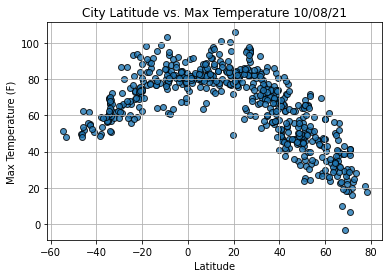

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

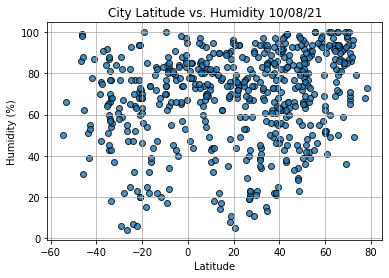

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

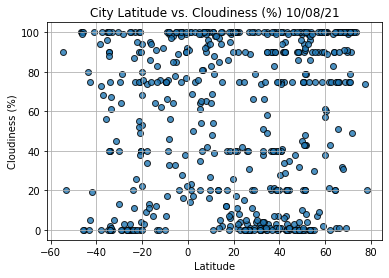

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

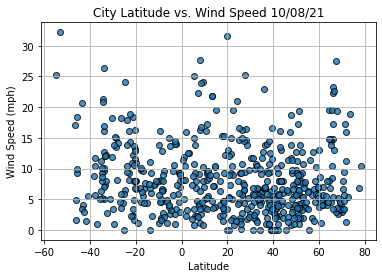

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                          Leh
Country                        IN
Date          2021-10-08 13:29:10
Lat                       34.1667
Lng                       77.5833
Max Temp                    54.95
Humidity                       15
Cloudiness                      0
Wind Speed                   6.24
Name: 13, dtype: object

In [29]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
551     True
552     True
553     True
554    False
555     True
Name: Lat, Length: 556, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Udarnyy,RU,2021-10-08 13:29:08,54.3409,42.8611,51.08,50,0,3.60
3,Wanning,CN,2021-10-08 13:28:03,18.8003,110.3967,76.89,91,100,12.15
4,Tasiilaq,GL,2021-10-08 13:26:20,65.6145,-37.6368,37.56,50,51,8.39
5,Ponta Do Sol,PT,2021-10-08 13:24:59,32.6667,-17.1000,79.72,68,38,1.54
6,Emborion,GR,2021-10-08 13:29:08,40.4833,21.5500,50.36,90,100,5.46


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

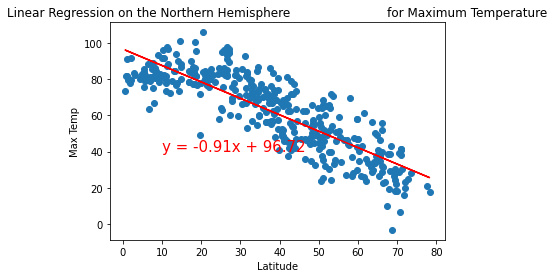

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

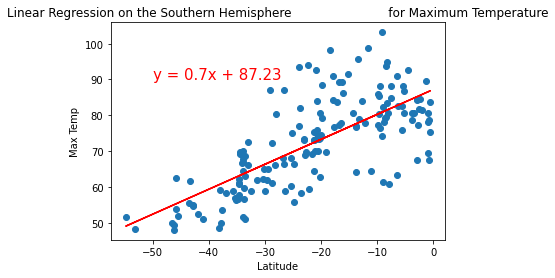

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

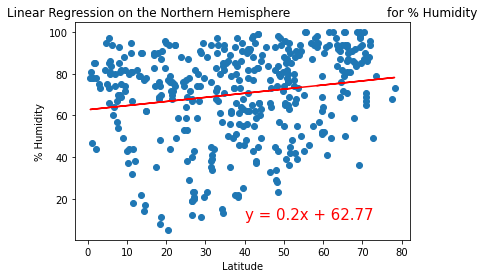

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

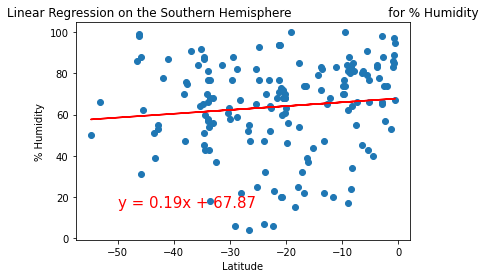

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [49]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(slope, intercept, r_value, p_value, std_err)

0.1861751291810309 67.8678522202926 0.10875919955394196 0.16566759825750121 0.13369473418989772


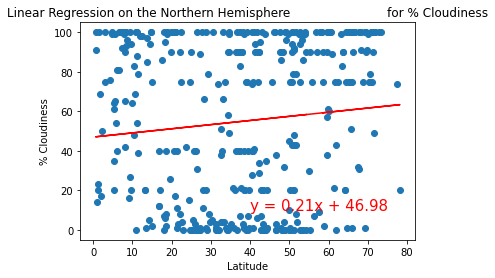

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [53]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(slope, intercept, r_value, p_value, std_err)

0.5764408481360637 68.10041160323087 0.19559379329453175 0.012074636976642482 0.227076245120322


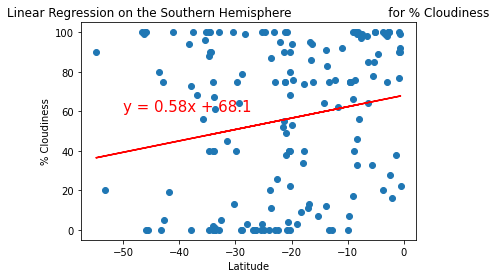

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [52]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(slope, intercept, r_value, p_value, std_err)

0.5764408481360637 68.10041160323087 0.19559379329453175 0.012074636976642482 0.227076245120322


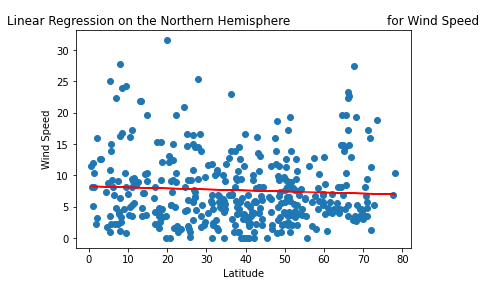

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [55]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(slope, intercept, r_value, p_value, std_err)

-0.016352331044404186 8.23212825683037 -0.05762212666779749 0.2550526393296347 0.014346167217574216


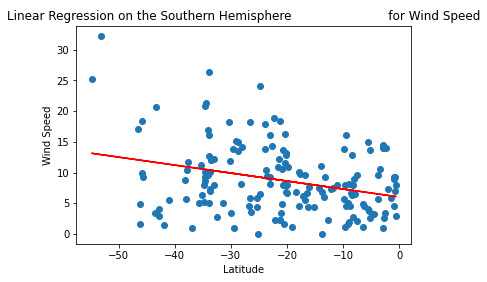

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [57]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(slope, intercept, r_value, p_value, std_err)

-0.13003035200159271 6.011706174067282 -0.3008804215498837 9.048494564903813e-05 0.032380811097206
